In [720]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Linear regression with one variable
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.
The file `ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. This script has already been set up to load this data for you.
### 2.1 Plotting the data
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Many other problems that you will encounter in real life are multi-dimensional and can't be plotted on a 2-d plot.
Run the code below to load the dataset from the data file into the variables X and y:

In [721]:
data = np.loadtxt('ex1data1.txt', delimiter=',')  # read comma separated data
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

Your job is to complete plotData to draw the plot; modify the file and fill in the following code:
```Matlab
plot(x, y, 'rx', 'MarkerSize', 10); % Plot the data
ylabel('Profit in $10,000s'); % Set the y-axis label
xlabel('Population of City in 10,000s'); % Set the x-axis label
```

In [722]:
def plot_data(x, y):
    """
    PLOTDATA Plots the data points x and y into a new figure 
    PLOTDATA(x,y) plots the data points and gives the figure axes labels of
    population and profit.
    """
    figure = plt.figure()  # open a new figure window
    ax = figure.add_subplot(111)
    ax.scatter(x, y, marker='x', s=100, color='red')
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')

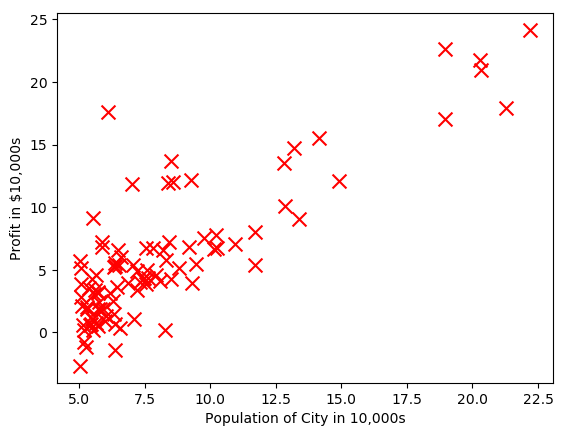

In [723]:
plot_data(X, y)

### 2.2 Gradient Descent
In this section, you will fit the linear regression parameters to our dataset using gradient descent.
#### 2.2.1 Update Equations
The objective of linear regression is to minimize the cost function

$$J\left(\theta \right)=\frac{1}{2m}\sum_{i=1}^m {\left(h_{\theta \;} \left(x^{\left(i\right)} \right)-y^{\left(i\right)} \right)}^2$$

where the hypothesis $h_{\theta \;}$ is given by the linear model
$$h_{\theta } \left(x\right)=\theta^T x=\theta_0 +\theta_1 x_1$$

Recall that the parameters of your model are the  values. These are the values you will adjust to minimize cost $J\left(\theta \right)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$$\theta_j :=\theta_j -\alpha \frac{\;1}{m}\sum_{i=1}^m \;\left(h_{\theta \;} \left(x^{\left(i\right)} \right)-y^{\left(i\right)} \right)x_j^{\left(i\right)} \;\;\;\;\;\;\;\left(\mathrm{simultaneously}\;\mathrm{update}\;\theta_{j\;} \;\mathrm{for}\;\mathrm{all}\;j\right)$$

With each step of gradient descent, your parameters  come closer to the optimal values that will achieve the lowest cost $J\left(\theta \right)$.

**Implementation Note**: We store each example as a row in the X matrix in MATLAB. To take into account the intercept term ($\theta_0$), we add an additional first column to **X** and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
#### 2.2.2 Implementation
In this script, we have already set up the data for linear regression. In the following lines, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Run the code below to initialize the parameters to 0 and the learning rate alpha to 0.01.

In [724]:
m = len(X)  # number of training examples
X_old = X.copy()
X = np.hstack((np.ones((m, 1)), X))  # Add a column of ones to x
theta = np.zeros((2, 1))  # initialize fitting parameters
iterations = 1500
alpha = 0.01

#### 2.2.3 Computing the cost $J\left(\theta \right)$
As you perform gradient descent to minimize the cost function $J\left(\theta \right)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J\left(\theta \right)$ so you can check the convergence of your gradient descent implementation.
Your next task is to complete the code in the `compute_cost`, which is a function that computes $J\left(\theta \right)$. As you are doing this, remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set.

In [725]:
def compute_cost(x, y, theta):
    """
    COMPUTECOST Compute cost for linear regression
    J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """

    # Initialize some useful values
    m = len(y)  # number of training examples

    # You need to return the following variables correctly 
    h = np.dot(x, theta)
    J = np.sum((h - y) ** 2) / (2 * m)
    return J

Once you have completed the function definition, run this section. The code below will call `compute_cost` once using $\theta$ initialized to zeros, and you will see the cost printed to the screen. You should expect to see a cost of 32.07 for the first output below:

In [726]:
# Compute and display initial cost with theta all zeros
compute_cost(X, y, theta)

32.072733877455676

Next we call `compute_cost` again, this time with non-zero theta values as an additional test. You should expect to see an output of 54.24 below:

In [727]:
# Compute and display initial cost with non-zero theta
compute_cost(X, y, np.array([[-1.], [2.]]))

54.24245508201238

If the outputs above match the expected values, you can submit your solution for assessment. If the outputs do not match or you receive an error, check your cost function for mistakes, then rerun this section once you have addressed them.

#### 2.2.4 Gradient descent
Next, you will implement gradient descent in the `gradient_descent`. The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration.
As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J\left(\theta \right)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J\left(\theta \right)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. Refer to the equations given earlier and to the video lectures if you are uncertain.
A good way to verify that gradient descent is working correctly is to look at the value of `J` and check that it is decreasing with each step. The starter code for `gradient_descent` calls `compute_cost` on every iteration and prints the cost. Assuming you have implemented gradient descent and `compute_cost` correctly, your value of $J\left(\theta \right)$ should never increase, and should converge to a steady value by the end of the algorithm.
After you are finished, run this execute this section. The code below will use your final parameters to plot the linear fit. 

In [728]:
def gradient_descent(x, y, theta, alpha, num_iters):
    """
    GRADIENTDESCENT Performs gradient descent to learn theta
    theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """
    # Initialize some useful values
    m = len(y)  # number of training examples
    J_history = np.zeros((num_iters, 1))

    for iter in range(num_iters):
        h = np.dot(x, theta)
        part_J = np.sum(np.multiply((h - y), x), axis=0).reshape(-1, 1)
        theta = theta - alpha / m * part_J
        J_history[iter] = compute_cost(X, y, theta)

    return theta, J_history

 Your final values for  will also be used to make predictions on profits in areas of 35,000 and 70,000 people.

Theta computed from gradient descent:
-3.630291,
1.166362
For population = 35,000, we predict a profit of 4519.767868

For population = 70,000, we predict a profit of 45342.450129


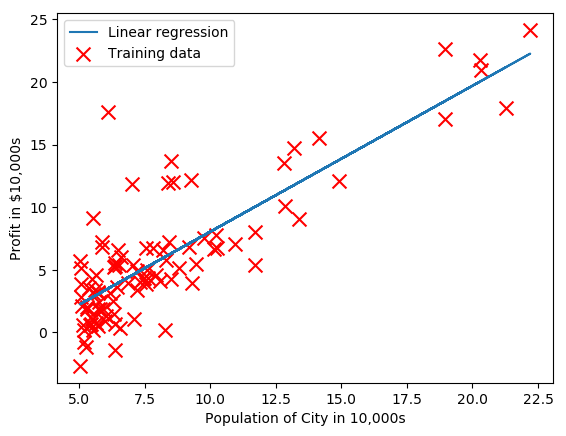

In [729]:
# Run gradient descent:
# Compute theta
theta, _ = gradient_descent(X, y, theta, alpha, iterations)

# Print theta to screen
# Display gradient descent's result
print('Theta computed from gradient descent:\n%f,\n%f' % (theta[0][0], theta[1][0]))

# Plot the linear fit
plot_data(X_old, y)  # keep previous plot visible
plt.plot(X[:, 1], np.dot(X, theta), linestyle='solid')
plt.legend(['Linear regression', 'Training data'])

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1, 3.5])[np.newaxis, :], theta)
print('For population = 35,000, we predict a profit of %f\n' % (predict1 * 10000))
predict2 = np.dot(np.array([1, 7])[np.newaxis, :], theta)
print('For population = 70,000, we predict a profit of %f\n' % (predict2 * 10000))

### 2.3 Debugging
Here are some things to keep in mind as you implement gradient descent: 
* Python array indices start from zero. If you're storing $\theta_0$ and $\theta_1$ in a vector called `theta`, the values will be `theta[0]` and `theta[1]` respectively.
* If you are seeing many errors at runtime, inspect your matrix operations to make sure that you're adding and multiplying matrices of compatible dimensions. Printing the dimensions of variables with the `.shape` parameter will help you debug.
*  By default, NumPy interprets math operators to be element-wise operations. If you want to perform matrix multiplication, you can use the `@` operator or the `np.dot()` function. If you want element-wise multiplication, you can use the `*` operator or the `np.multiply()` function.

### 2.4 Visualizing $J\left(\theta \right)$
To understand the cost function $J\left(\theta \right)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.
 In the next step, there is code set up to calculate $J\left(\theta \right)$ over a grid of values using the `compute_cost` function that you wrote. 

In [730]:
# Visualizing J(theta_0, theta_1):
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])[:, np.newaxis]
        J_vals[i, j] = compute_cost(X, y, t)

After the code above is executed, you will have a 2-D array of $J\left(\theta \right)$ values. The code below will then use these values to produce surface and contour plots of $J\left(\theta \right)$ using the `plot_surface` and `contour` commands. Run the code in this section now. The resulting plots should look something like the figure below.

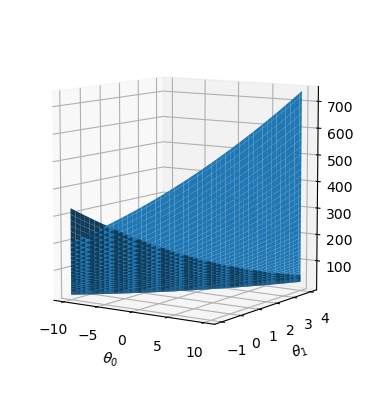

In [731]:
from mpl_toolkits.mplot3d import Axes3D

# Because of the way meshgrids work in the surf command, we need to 
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = np.transpose(J_vals)

# Surface plot
figure = plt.figure(figsize=plt.figaspect(0.5))
ax = figure.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals)
ax.set_xlabel(r'$\theta_0$');
ax.set_ylabel(r'$\theta_1$');
ax.view_init(8, -56)

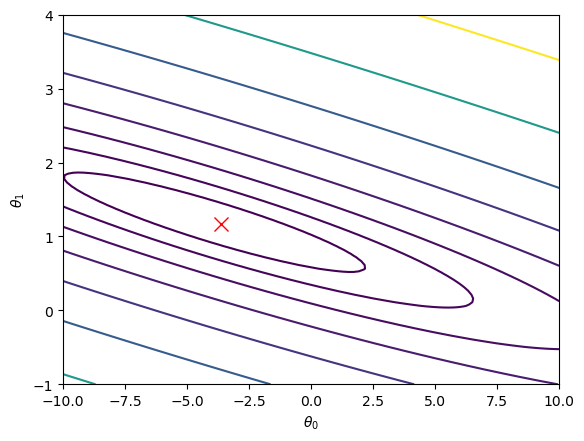

In [732]:
# Contour plot
# figure;
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$')
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2);

 The purpose of these graphs is to show you that how $J\left(\theta \right)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J\left(\theta \right)$ is bowl-shaped and has a global minimum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

## Optional Exercises:
If you have successfully completed the material above, congratulations! You now understand linear regression and should able to start using it on your own datasets. For the rest of this programming exercise, we have included the following optional exercises. These exercises will help you gain a deeper understanding of the material, and if you are able to do so, we encourage you to complete them as well.

## 3. Linear regression with multiple variables
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.
The file `ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house. Run this section now to preview the data.

In [733]:
# Load Data
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2:]
m = len(y)

# Print out some data points
# First 10 examples from the dataset
for i in range(10):
    print(' x = [%.0f %.0f], y = %.0f \n' % (X[i, 0], X[i, 1], y[i, :]))

 x = [2104 3], y = 399900 

 x = [1600 3], y = 329900 

 x = [2400 3], y = 369000 

 x = [1416 2], y = 232000 

 x = [3000 4], y = 539900 

 x = [1985 4], y = 299900 

 x = [1534 3], y = 314900 

 x = [1427 3], y = 198999 

 x = [1380 3], y = 212000 

 x = [1494 3], y = 242500 


The remainder of this script has been set up to help you step through this exercise.

### 3.1 Feature Normalization
This section of the script will start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

   Your task here is to complete the code in `feature_normalize` to:
* Subtract the mean value of each feature from the dataset.
* After subtracting the mean, additionally scale (divide) the feature values by their respective "standard deviations".

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within $\pm 2$ standard deviations of the mean); this is an alternative to taking the range of values (max - min). In NumPy, you can use the `std` function to compute the standard deviation. For example, inside `feature_normalize`, the quantity `X[:,0]` contains all the values of  (house sizes) in the training set, so `np.std(X[:,0])` computes the standard deviation of the house sizes. At the time that `feature_normalize` is called, the extra column of 1's corresponding to  has not yet been added to X (see the code below for details).

In [747]:
def feature_normalize(x):
    """
    %FEATURENORMALIZE Normalizes the features in X 
    FEATURENORMALIZE(X) returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms. 
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    t = np.ones((len(X), 1))
    X_norm = (X - (t * mu)) / (t * sigma)
    return X_norm, mu, sigma

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix X corresponds to one feature. When you are finished with `feature_normalize`, run this section to normalize the features of the housing dataset.

In [735]:
# Scale features and set them to zero mean
X, mu, sigma = feature_normalize(X)

**Implementation Note**: When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

#### Add the bias term
Now that we have normalized the features, we again add a column of ones corresponding to $\theta_0$ to the data matrix X.

In [736]:
# Add intercept term to X
X = np.hstack((np.ones((m, 1)), X))

### 3.2 Gradient Descent
Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.
 You should complete the code in `compute_cost_multi` and `gradient_descent_multi` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized. You can use the command `X.shape[1]` to find out how many features are present in the dataset.
 We have provided you with the following starter code below that runs gradient descent with a particular learning rate (`alpha`). Your task is to first make sure that your functions `compute_cost` and `gradient_descent` already work with this starter code and support multiple variables.  
**Implementation Note**: In the multivariate case, the cost function can also be written in the following vectorized form:
$$J(\theta)=\frac{1}{2m}\left(X\theta-\vec{y}\right)^T\left(X\theta-\vec{y}\right)$$
where
$$X=\left\lbrack \begin{array}{c}
{-\;\left(x^{\left(1\right)} \right)}^T -\\
{-\;\left(x^{\left(2\right)} \right)}^T -\\
\vdots \;\\
{-\;\left(x^{\left(m\right)} \right)}^T -
\end{array}\right\rbrack \;\;\;\;\;\;\;\;\;\;\;\vec{y} =\left\lbrack \begin{array}{c}
y^{\left(1\right)} \\
y^{\left(2\right)} \\
\vdots \;\\
y^{\left(m\right)} 
\end{array}\right\rbrack$$

In [737]:
def compute_cost_multi(x, y, theta):
    """
    COMPUTECOSTMULTI Compute cost for linear regression with multiple variables
    J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y

    """
    # Initialize some useful values
    m = len(y)  # number of training examples

    h = np.dot(x, theta)
    J = np.sum((h - y) ** 2) / (2 * m)

    return J

In [738]:
def gradient_descent_multi(x, y, theta, alpha, iterations):
    """
    GRADIENTDESCENTMULTI Performs gradient descent to learn theta
       theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
       taking num_iters gradient steps with learning rate alpha 
    """
    # Initialize some useful values
    m = len(y)  # number of training examples
    J_history = np.zeros((iterations, 1))

    for iter in range(iterations):
        h = np.dot(x, theta)
        part_J = np.sum(np.multiply((h - y), x), axis=0).reshape(-1, 1)
        theta = theta - alpha / m * part_J
        J_history[iter] = compute_cost_multi(X, y, theta)

    return theta, J_history

In [739]:
# Run gradient descent
# Choose some alpha value
alpha = 0.1
num_iters = 400

# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1))
theta, _ = gradient_descent_multi(X, y, theta, alpha, num_iters)

# Display gradient descent's result
print('Theta computed from gradient descent:\n%f\n%f\n%f' % (theta[0], theta[1], theta[2]))

Theta computed from gradient descent:
340412.659574
109447.795586
-6578.353971


Finally, you should complete and run the code below to predict the price of a 1650 sq-ft, 3 br house using the value of theta obtained above. 
**Hint**: At prediction, make sure you do the same feature normalization. Recall that the first column of X is all ones. Thus, it does not need to be normalized.

In [740]:
# Estimate the price of a 1650 sq-ft, 3 br house
price = np.dot(np.array([1, 1.65, 3])[np.newaxis, :], theta)  # Enter your price formula here
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n $%f' % price);

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $501266.460379


#### 3.2.1 Optional (ungraded) exercise: Selecting learning rates
In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying the code below and changing the part of the code that sets the learning rate.
 The code below will call your `gradient_descent` function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of $J\left(\theta \right)$ values in a vector `J`. After the last iteration, the code plots the `J` values against the number of the iterations. If you picked a learning rate within a good range, your plot should look similar Figure 4 below.
 If your graph looks very different, especially if your value of $J\left(\theta \right)$ increases or even blows up, use the control to adjust your learning rate and try again. We recommend trying values of the learning rate on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.
**Implementation Note**: If your learning rate is too large, $J\left(\theta \right)$ can diverge and 'blow up', resulting in values which are too large for computer calculations.

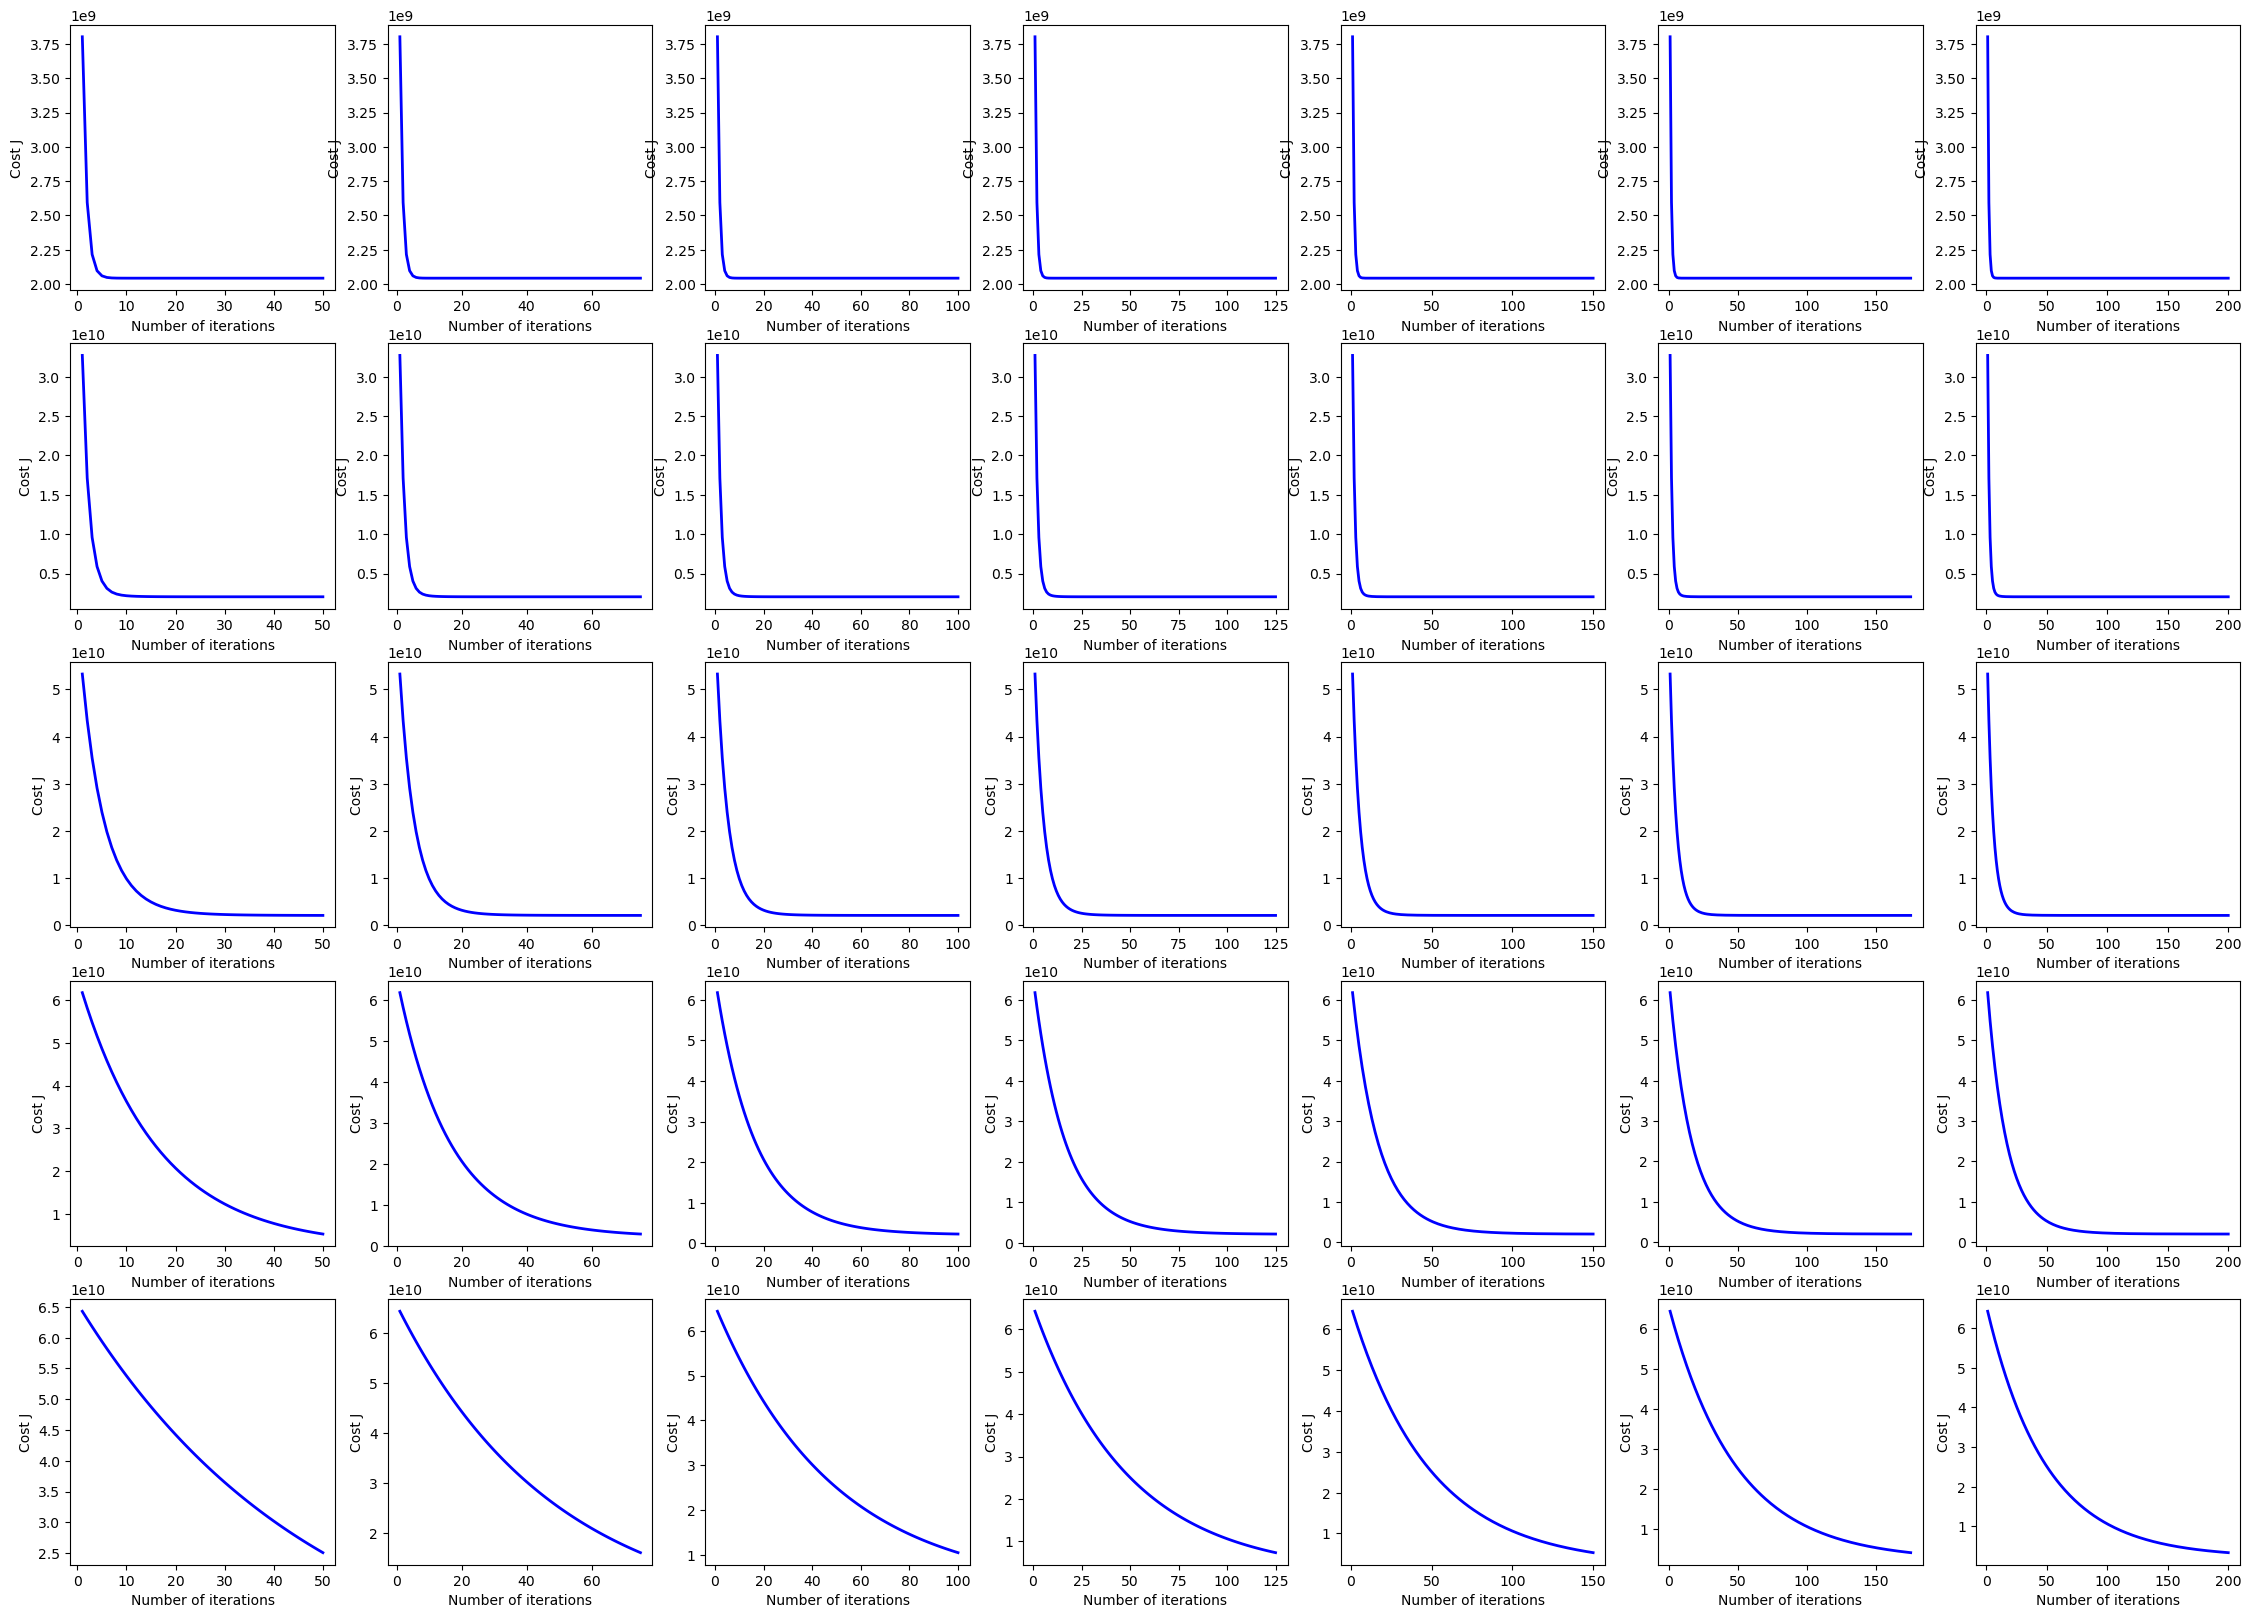

In [741]:
# Run gradient descent:
# Choose some alpha value
i = 1
m = len([1, .3, .1, .03, .01])
n = len(range(50, 225, 25))

figure = plt.figure(figsize=(28, 20))
for alpha in [1, .3, .1, .03, .01]:
    for num_iters in range(50, 225, 25):
        # Init Theta and Run Gradient Descent 
        theta = np.zeros((3, 1))
        _, J_history = gradient_descent_multi(X, y, theta, alpha, num_iters)
        # Plot the convergence graph
        figure.add_subplot(m, n, i)
        plt.plot(range(1, num_iters + 1), J_history, '-b', linewidth=2)
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost J')
        i += 1

Using the best learning rate that you found, run the section of code below, which will run gradient descent until convergence to find the final values of $\theta$. Next, use this value of $\theta$ to predict the price of a house with 1650 square feet and 3 bedrooms. You will use value later to check your implementation of the normal equations. Don't forget to normalize your features when you make this prediction!

In [742]:
# Run gradient descent
# Replace the value of alpha below best alpha value you found above
alpha = 0.1
num_iters = 50

# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1))
theta, _ = gradient_descent_multi(X, y, theta, alpha, num_iters)

# Display gradient descent's result
print('Theta computed from gradient descent:\n%f\n%f\n%f' % (theta[0], theta[1], theta[2]))

Theta computed from gradient descent:
338658.249249
103322.829430
-474.742495


In [743]:
# Estimate the price of a 1650 sq-ft, 3 br house. You can use the same
# code you entered earlier to predict the price
price = np.dot(np.array([1, 1.65, 3])[np.newaxis, :], theta)  # Enter your price formula here
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n $%f' % price);

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $507716.690322


### 3.3 Normal Equations
In the lecture videos, you learned that the closed-form solution to linear regression is
$$\theta = \left(X^T X\right)^{-1} X^T \vec{y} $$
Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no "loop until convergence" like in gradient descent.
Complete the code in `normal_eqn` to use the formula above to calculate $\theta$, then run the code in this section. Remember that while you don't need to scale your features, we still need to add a column of 1's to the X matrix to have an intercept term ($\theta_0$) . Note that the code below will add the column of 1's to X for you.

In [744]:
def normal_eqn(x, y):
    """
    NORMALEQN Computes the closed-form solution to linear regression 
    NORMALEQN(X,y) computes the closed-form solution to linear 
    regression using the normal equations.
    """

    theta = np.linalg.pinv(X.T @ X) @ X.T @ y

    return theta

In [745]:
# Solve with normal equations:
# Load Data
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2:]
m = len(y)

# Add intercept term to X
X = np.hstack((np.ones((m, 1)), X))

# Calculate the parameters from the normal equation
theta = normal_eqn(X, y)

# Display normal equation's result
print('Theta computed from the normal equations:\n%f\n%f\n%f' % (theta[0], theta[1], theta[2]))

Theta computed from the normal equations:
89597.909544
139.210674
-8738.019113


**Optional (ungraded) exercise**: Now, once you have found  using this method, use it to make a price prediction for a 1650-square-foot house with 3 bedrooms. You should find that gives the same predicted price as the value you obtained using the model fit with gradient descent (in Section 3.2.1).

In [746]:
# Estimate the price of a 1650 sq-ft, 3 br house.
price = np.dot(np.array([1, 1.65, 3])[np.newaxis, :], theta)  # Enter your price formula here
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n $%f' % price);

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $63613.549818
